# [K means](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Lectures/Lec13-KMeans.ipynb)

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

blobs_raw = pd.DataFrame([X[:,0], X[:,1], y]).T
blobs_raw.columns = ['x1','x2','label']
blobs_raw['label'] = blobs_raw.label.astype(int)
blobs_raw.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


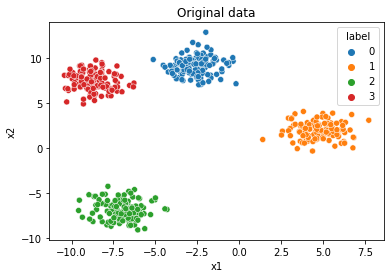

In [10]:
sns.scatterplot(data=blobs_raw, x='x1', y='x2', hue='label', palette='tab10').set_title('Original data');

In [12]:
X = blobs_raw.drop(columns=['label'])
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

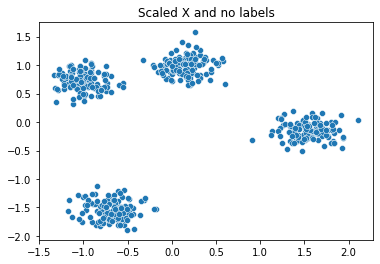

In [14]:
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1]).set_title('Scaled X and no labels');

## K-means clustering

In [15]:
from sklearn.cluster import KMeans

clusters = range(1,10)
sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

sum_squared_distances

[999.9999999999999,
 522.1570539287742,
 116.0956785275553,
 28.78693897887403,
 25.607929506224536,
 22.849209910106808,
 20.285609196324867,
 18.04001913315081,
 16.32587749244801]

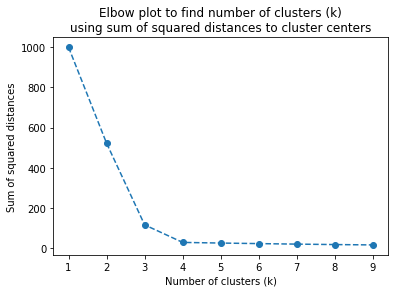

In [36]:
fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, "--o")
ax.set(
    title="Elbow plot to find number of clusters (k)\nusing sum of squared distances to cluster centers",
    xlabel="Number of clusters (k)",
    ylabel="Sum of squared distances",
);

In [24]:
SSD_differences = pd.Series(sum_squared_distances).diff()[1:]
SSD_differences

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.179009
5     -2.758720
6     -2.563601
7     -2.245590
8     -1.714142
dtype: float64

## Silhouette score

In [26]:
KMeans(4).fit(scaled_X).labels_

array([3, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2, 0, 2, 0, 1, 2, 0, 3, 3, 0, 2, 0,
       2, 3, 3, 1, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0,
       0, 2, 2, 2, 1, 3, 1, 0, 3, 1, 2, 0, 0, 3, 1, 3, 3, 0, 1, 3, 2, 1,
       1, 3, 2, 1, 2, 1, 1, 3, 0, 3, 0, 1, 2, 0, 1, 2, 1, 0, 3, 3, 3, 3,
       2, 0, 3, 1, 2, 1, 2, 3, 0, 2, 0, 3, 2, 2, 2, 3, 3, 0, 0, 3, 0, 3,
       1, 3, 3, 3, 3, 1, 2, 3, 1, 1, 0, 2, 1, 2, 3, 2, 2, 1, 1, 3, 3, 2,
       2, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 1, 3, 3, 0, 0, 0, 1, 1, 2, 2,
       0, 3, 0, 3, 1, 1, 3, 3, 2, 2, 1, 0, 2, 1, 3, 3, 1, 0, 0, 3, 3, 0,
       0, 1, 1, 1, 0, 3, 0, 0, 3, 3, 0, 2, 0, 1, 1, 3, 3, 1, 0, 1, 0, 0,
       3, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 3, 3, 1, 3, 0, 0, 1, 0, 3, 0, 2,
       2, 0, 3, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 3, 1, 0, 1, 2, 2, 2, 1,
       0, 2, 3, 3, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 2, 0, 0, 3, 0,
       1, 1, 2, 0, 2, 1, 0, 0, 2, 3, 0, 0, 0, 2, 3, 1, 0, 2, 2, 0, 1, 0,
       2, 3, 2, 1, 1, 0, 0, 2, 3, 2, 3, 2, 1, 2, 1,

In [27]:
kmeans = [KMeans(k).fit(scaled_X) for k in clusters]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
silhouette_scores

[0.5610092879937781,
 0.7466113868280719,
 0.7979185955370355,
 0.6784830182679628,
 0.5517566012703626,
 0.43022848182320955,
 0.3470542116003955,
 0.3495464993261673]

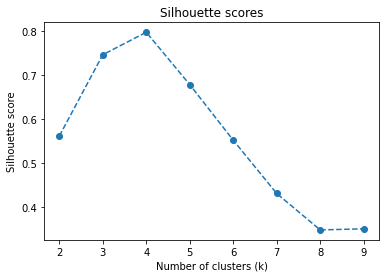

In [35]:
fit, ax = plt.figure(), plt.axes()
ax.plot(clusters[1:], silhouette_scores, 'o--')
ax.set(title='Silhouette scores', xlabel='Number of clusters (k)', ylabel='Silhouette score');

## Visualization

In [37]:
kmeans[4].cluster_centers_

array([[-0.68486276, -1.54855438],
       [ 0.14957993,  0.98016683],
       [ 1.39766801, -0.15639583],
       [-1.00366735,  0.72139948],
       [ 1.71876383, -0.14870515]])

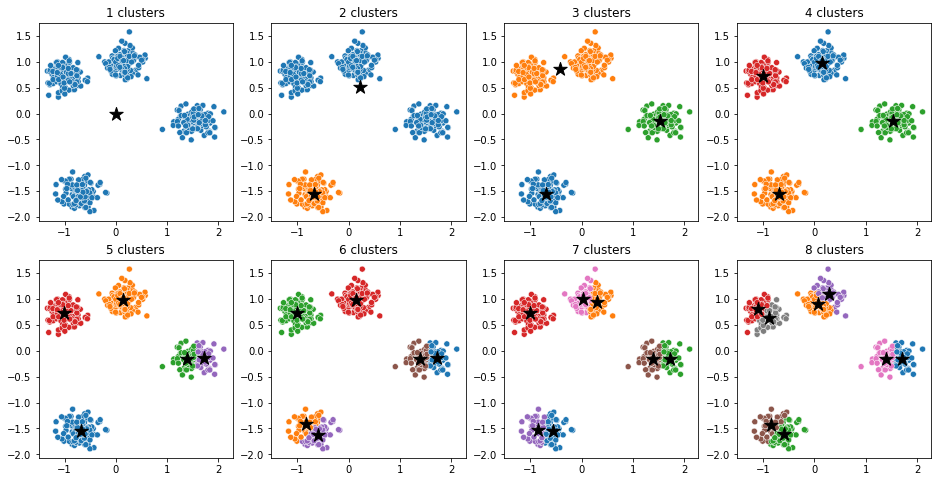

In [42]:
df_plot = pd.DataFrame(scaled_X, columns=['x1','x2'])
number_of_plots_per_row = round(len(clusters)/2)
fig,axes = plt.subplots(2, number_of_plots_per_row, figsize=(16,8))

for k,ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[k].cluster_centers_
    df_plot['label'] = kmeans[k].labels_

    sns.scatterplot(data=df_plot, x='x1', y='x2', hue='label', ax=ax, palette='tab10')
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=200, marker='*', color='black')
    ax.legend([],[],frameon=False)
    ax.set(title= f'{k+1} clusters', xlabel='', ylabel='')